In [ ]:
import numpy as np 
import pandas as pd 
# Input data files are available in the read-only "pre./input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import keras
import tensorflow as tf
import cv2 
import tqdm
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets #required for classification
import io #for input n output 
from PIL import Image #Public Image Library
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #for spliting train and test data
tf.random.set_seed(393) #set our seed for replicable results

We will put all images in the training and testing sets into x and y train and split it ourselves

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
#convert x and y train to arrays of images
X_train = np.array(X_train)
Y_train = np.array(Y_train)

FileNotFoundError: ignored

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

#3264 images in X_train and the images are 150x150 with 3 color channels

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=393)

In [ ]:
print(X_train.shape)
print(y_test.shape)

(2611, 150, 150, 3)
(653,)


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train) #convert label indexes to categorical variables
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [ ]:
#model 1 9 convolutional layers with maxpooling and dropout. kernel/filter size 3,3
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(150,150,3))) #specify image shape from training set
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2)) #add may pooling/padding 2x2
model.add(Dropout(0.3)) #0.3 dropout

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3)) #0.3 dropout

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3)) #0.3 dropout

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3)) #0.3 dropout

model.add(Flatten()) #flatten before dense layer ouput. converts to 1d vector
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3)) #0.3 dropout
model.add(Dense(4,activation='softmax')) #softmax for output layer for multiclass classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 73, 73, 128)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 71, 71, 64)        73792     
                                                                 
 conv2d_29 (Conv2D)          (None, 69, 69, 128)       73856     
                                                      

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"]) 


In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20


2023-05-05 00:04:39.420709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


66/66 [==============================] - 10s 103ms/step - loss: 1.8917 - accuracy: 0.3027 - val_loss: 1.3764 - val_accuracy: 0.2945
Epoch 2/20
66/66 [==============================] - 6s 97ms/step - loss: 1.3323 - accuracy: 0.3544 - val_loss: 1.4160 - val_accuracy: 0.2983
Epoch 3/20
66/66 [==============================] - 7s 102ms/step - loss: 1.1113 - accuracy: 0.5206 - val_loss: 1.3228 - val_accuracy: 0.3881
Epoch 4/20
66/66 [==============================] - 7s 102ms/step - loss: 0.9438 - accuracy: 0.5852 - val_loss: 1.0331 - val_accuracy: 0.5296
Epoch 5/20
66/66 [==============================] - 7s 102ms/step - loss: 0.7992 - accuracy: 0.6633 - val_loss: 0.7131 - val_accuracy: 0.6883
Epoch 6/20
66/66 [==============================] - 6s 97ms/step - loss: 0.7627 - accuracy: 0.6858 - val_loss: 0.7721 - val_accuracy: 0.6501
Epoch 7/20
66/66 [==============================] - 6s 97ms/step - loss: 0.6631 - accuracy: 0.7146 - val_loss: 0.6170 - val_accuracy: 0.7591
Epoch 8/20
66/66 [=

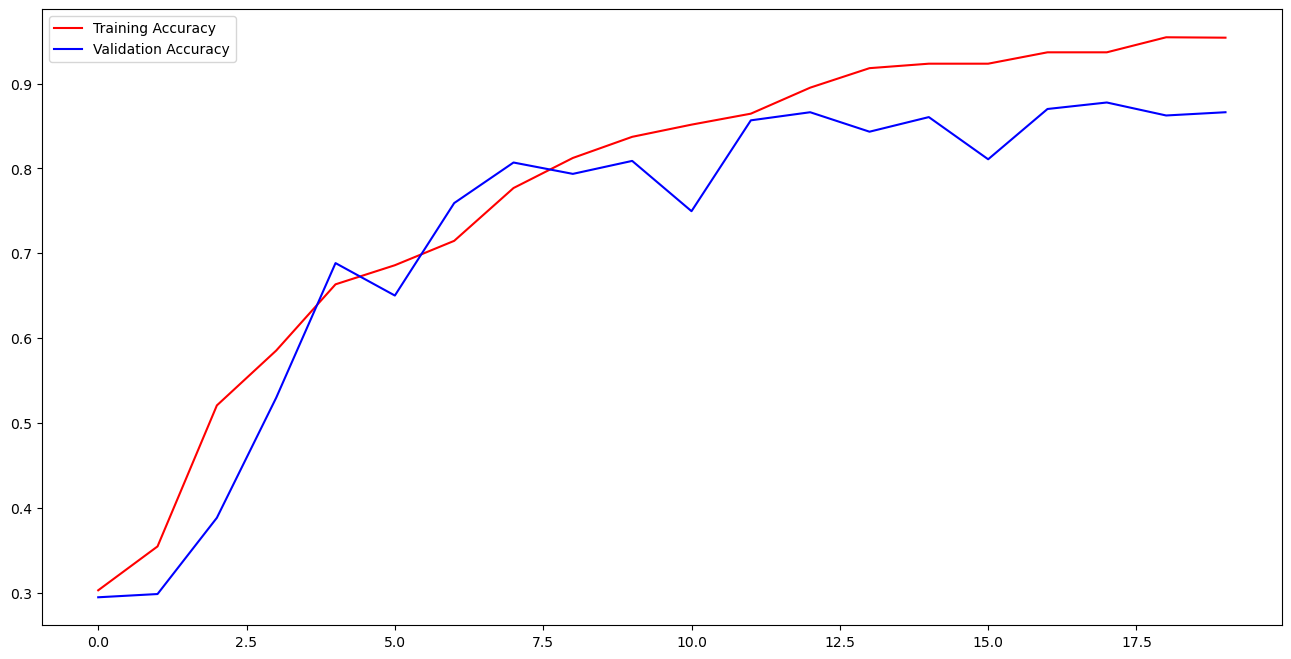

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

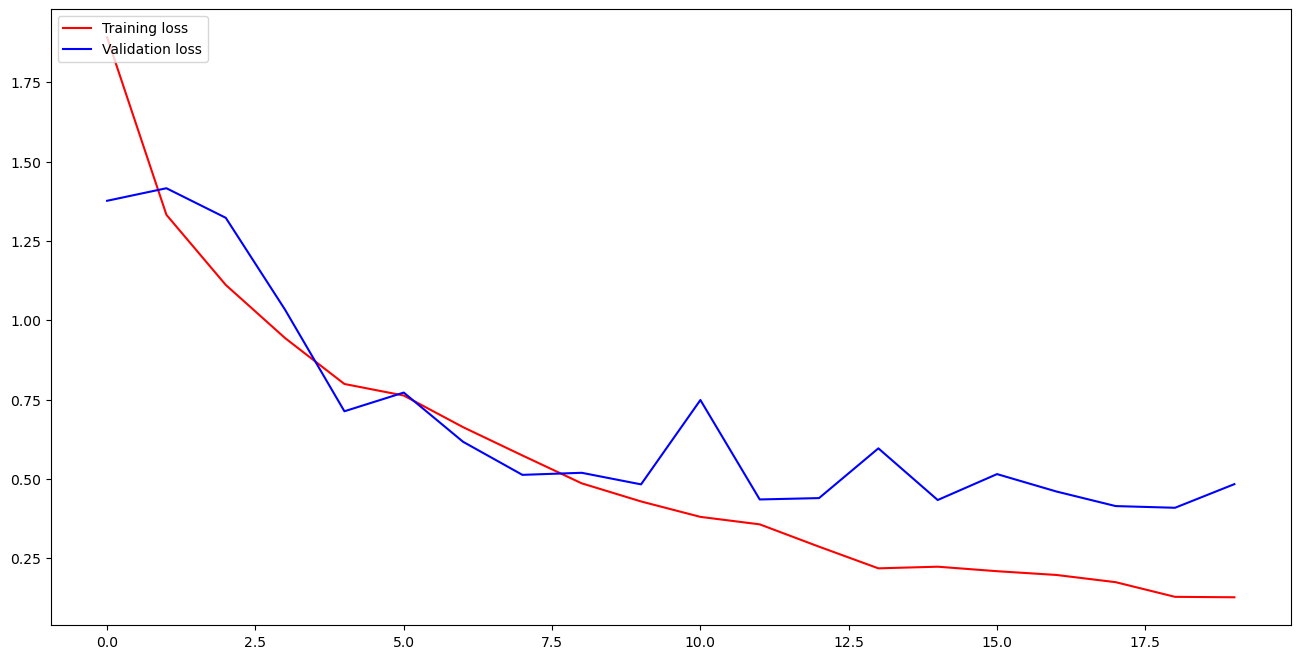

In [ ]:
#plots training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#make predictions on the test set
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test,axis=1)
y_test_new = np.argmax(y_test,axis=1)

print(classification_report(y_test_new,pred_test, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor

21/21 [==============================] - 0s 17ms/step
                  precision    recall  f1-score   support

    Glioma Tumor       0.87      0.90      0.88       192
        No Tumor       0.88      0.89      0.88        99
Meningioma Tumor       0.89      0.81      0.85       196
 Pituitary Tumor       0.93      0.98      0.96       166

        accuracy                           0.89       653
       macro avg       0.89      0.90      0.89       653
    weighted avg       0.89      0.89      0.89       653



In [ ]:
#train preds
pred_train = model.predict(X_train)
pred_train = np.argmax(pred_train,axis=1)
y_train_new = np.argmax(y_train,axis=1)

print(classification_report(y_train_new,pred_train, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor

82/82 [==============================] - 1s 18ms/step
                  precision    recall  f1-score   support

    Glioma Tumor       0.95      0.96      0.95       734
        No Tumor       0.96      0.95      0.95       401
Meningioma Tumor       0.96      0.94      0.95       741
 Pituitary Tumor       0.98      1.00      0.99       735

        accuracy                           0.96      2611
       macro avg       0.96      0.96      0.96      2611
    weighted avg       0.96      0.96      0.96      2611



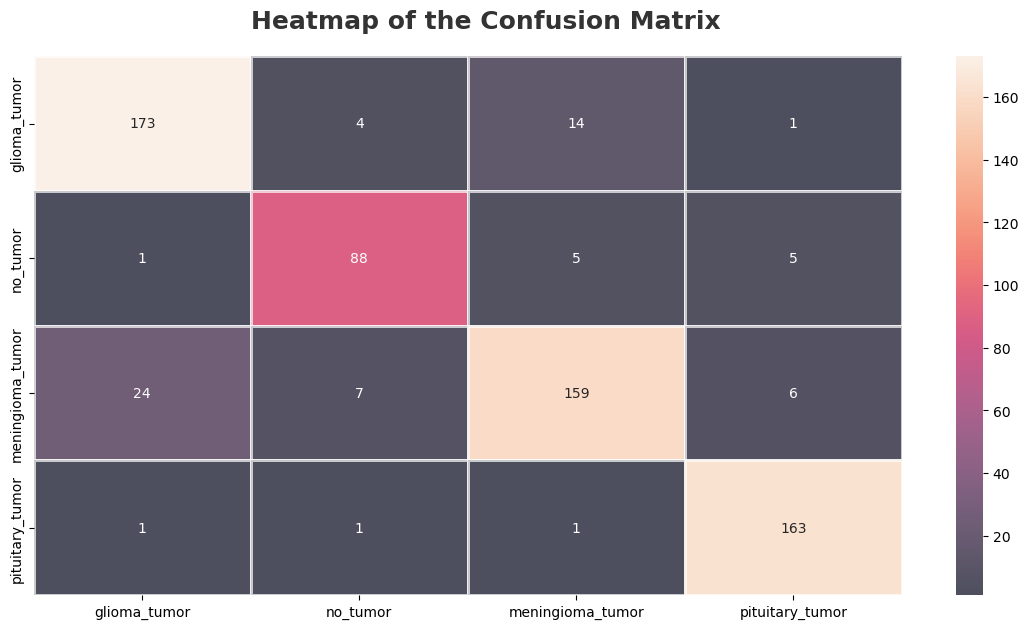

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred_test),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2, fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',y=0.92,x=0.28,alpha=0.8)

plt.show()
#the results of the confusion matrix show that the model is performing well(most values are in the main diagonal)
# Most of the misclassifications the model is making is classifying it as a glioma_tumor when it is a mningoma tumor. 
#The Result that we most care about however is a false negative and in the confusion matrix, we see that there are xxx 

#false negatives. 
# We define a false negative to be when the network classifies no_tumor when the true value is that there is a tumor(glioma, meningioma, pituary)

#There are xxx false positive in total

In [ ]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/p (56).jpg')
img = cv2.resize(img,(150,150)) #resize image to 150,150
img_array = np.array(img)
img_array.shape

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

This is the image we are attempting to predict: it is in the testing set and it is a Pituitary tumor


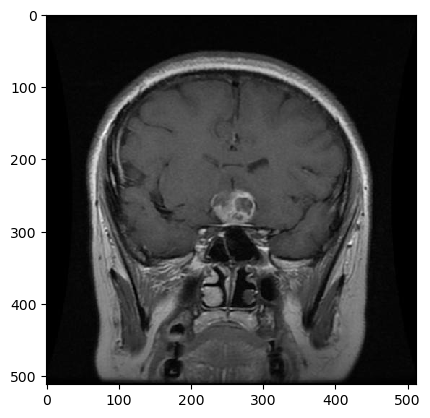

1/1 [==============================] - 0s 28ms/step
The model predicts it is a Pituitary Tumor


In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(56).jpg')
plt.imshow(img,interpolation='nearest')
print("This is the image we are attempting to predict: it is in the testing set and it is a Pituitary tumor")
plt.show()

opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img = cv2.resize(opencvImage,(150,150))
img = img.reshape(1,150,150,3) #change it (150x150) with 3 color channels
p = model.predict(img)
p = np.argmax(p,axis=1)[0] #get index of prediction
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor
if p==0:
    p='Glioma Tumor'
elif p==1:
    print('The model predicts that there is no tumor')
elif p==2:
    p='Meningioma Tumor'
else:
    p='Pituitary Tumor'
print("The model predicts it is a",p)

This is the image we are attempting to predict: it is in the testing set and it is NOT A TUMOR


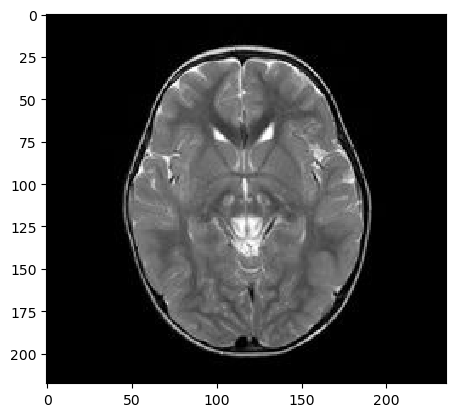

1/1 [==============================] - 0s 30ms/step
The model predicts that there is no tumor


In [ ]:
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(2).jpg')
plt.imshow(img,interpolation='nearest')
print("This is the image we are attempting to predict: it is in the testing set and it is NOT A TUMOR")
plt.show()

opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img = cv2.resize(opencvImage,(150,150))
img = img.reshape(1,150,150,3) #change it (150x150) with 3 color channels
p = model.predict(img)
p = np.argmax(p,axis=1)[0] #get index of prediction
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor

if p==0:
    p='Glioma Tumor'
elif p==1:
    print('The model predicts that there is no tumor')
elif p==2:
    p='Meningioma Tumor'
else:
    p='Pituitary Tumor'
if p!=1:
        print(f'The Model predicts that it is a {p}')
#misclassification(false positive)

This is the image we are attempting to predict: it is in the testing set and it is a Meningioma tumor


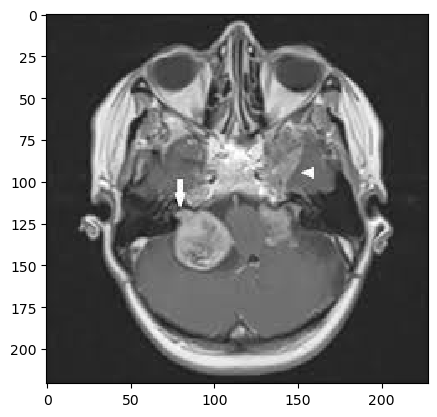

1/1 [==============================] - 0s 19ms/step
The Model predicts that it is a Meningioma Tumor


In [ ]:
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg')
plt.imshow(img,interpolation='nearest')
print("This is the image we are attempting to predict: it is in the testing set and it is a Meningioma tumor")
plt.show()

opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img = cv2.resize(opencvImage,(150,150))
img = img.reshape(1,150,150,3) #change it (150x150) with 3 color channels
p = model.predict(img)
p = np.argmax(p,axis=1)[0] #get index of prediction
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor
if p==0:
    p='Glioma Tumor'
elif p==1:
    print('The model predicts that there is no tumor')
elif p==2:
    p='Meningioma Tumor'
else:
    p='Pituitary Tumor'
if p!=1:
        print(f'The Model predicts that it is a {p}') #prints result if it is a tumor
#the model correctly predicts the output

This is the image we are attempting to predict: it is in the testing set and it is a Glioma tumor


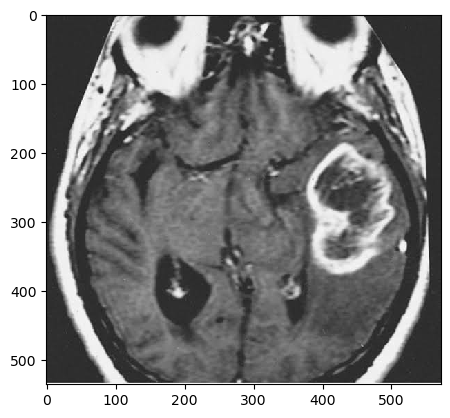

1/1 [==============================] - 0s 19ms/step
The Model predicts that it is a Glioma Tumor


In [ ]:
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(42).jpg')
plt.imshow(img,interpolation='nearest')
print("This is the image we are attempting to predict: it is in the testing set and it is a Glioma tumor")
plt.show()

opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img = cv2.resize(opencvImage,(150,150))
img = img.reshape(1,150,150,3) #change it (150x150) with 3 color channels
p = model.predict(img)
p = np.argmax(p,axis=1)[0] #get index of prediction
#index 0: glioma, index 1: no_tumor, index 2 = meningioma_tumor, index 3: pituitary_tumor

if p==0:
    p='Glioma Tumor'
elif p==1:
    print('The model predicts that there is no tumor')
elif p==2:
    p='Meningioma Tumor'
else:
    p='Pituitary Tumor'
    
    
if p!=1:
        print(f'The Model predicts that it is a {p}') #prints result if it is a tumor
#the model correctly predicts the output

In [ ]:
#model 2: 4 convolutional layers, 2 dense layers, same # of hidden units and same parameters from model 1
#instead of 20 epochs we will use 50 since there are less convolutional layers
model2 = Sequential()
model2.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(150,150,3))) #specify image shape from training set
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2)) #add may pooling/padding 2x2
model2.add(Dropout(0.3)) #0.3 dropout

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(Conv2D(256,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3)) #0.3 dropout

model2.add(Flatten()) #flatten before dense layer ouput
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dropout(0.3)) #0.3 dropout
model2.add(Dense(4,activation='softmax')) #softmax for output layer
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 conv2d_36 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 73, 73, 128)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 71, 71, 128)       147584    
                                                                 
 conv2d_38 (Conv2D)          (None, 69, 69, 256)       295168    
                                                      

In [ ]:
model2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"]) 
history = model2.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50


2023-05-05 00:08:25.090348: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_24/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


66/66 [==============================] - 10s 120ms/step - loss: 18.4718 - accuracy: 0.4579 - val_loss: 1.0195 - val_accuracy: 0.5621
Epoch 2/50
66/66 [==============================] - 8s 120ms/step - loss: 0.9200 - accuracy: 0.6355 - val_loss: 0.7325 - val_accuracy: 0.7075
Epoch 3/50
66/66 [==============================] - 8s 117ms/step - loss: 0.6270 - accuracy: 0.7601 - val_loss: 0.6416 - val_accuracy: 0.7878
Epoch 4/50
66/66 [==============================] - 8s 121ms/step - loss: 0.4862 - accuracy: 0.8065 - val_loss: 0.5910 - val_accuracy: 0.8031
Epoch 5/50
66/66 [==============================] - 8s 120ms/step - loss: 0.3449 - accuracy: 0.8793 - val_loss: 0.6521 - val_accuracy: 0.8164
Epoch 6/50
66/66 [==============================] - 8s 120ms/step - loss: 0.2597 - accuracy: 0.9047 - val_loss: 0.6753 - val_accuracy: 0.8184
Epoch 7/50
66/66 [==============================] - 8s 120ms/step - loss: 0.1785 - accuracy: 0.9353 - val_loss: 0.6103 - val_accuracy: 0.8470
Epoch 8/50
66/6

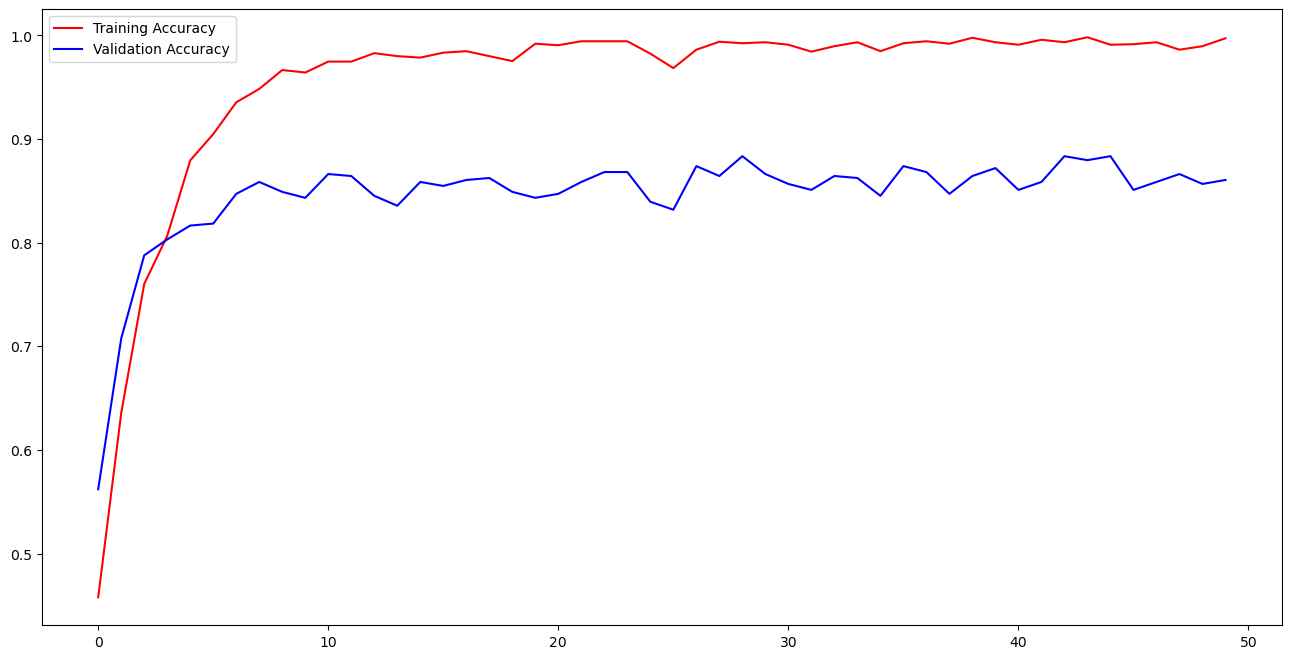

In [ ]:
#model 2 plot 1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

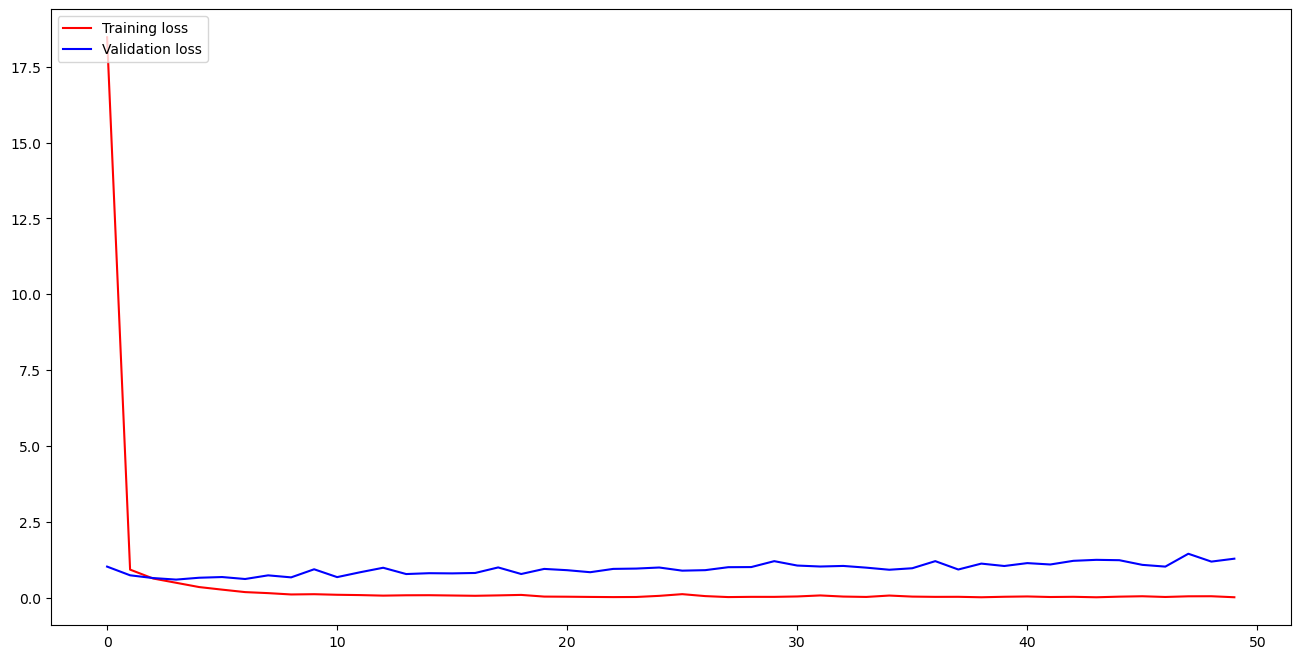

In [ ]:
#model 2 plot 2
#plots training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

21/21 [==============================] - 1s 22ms/step
                  precision    recall  f1-score   support

    Glioma Tumor       0.89      0.90      0.89       192
        No Tumor       0.84      0.77      0.80        99
Meningioma Tumor       0.86      0.81      0.83       196
 Pituitary Tumor       0.90      0.99      0.94       166

        accuracy                           0.88       653
       macro avg       0.87      0.87      0.87       653
    weighted avg       0.87      0.88      0.87       653



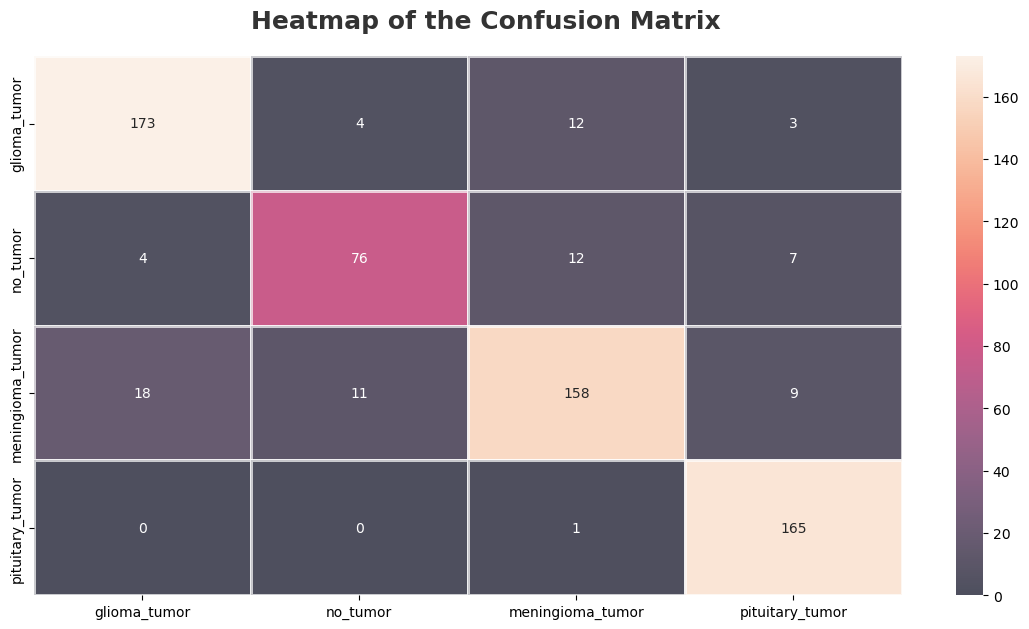

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#make predictions on the test set
pred = model2.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

print(classification_report(y_test_new,pred, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2, fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
#train predictions
pred_train = model2.predict(X_train)
pred = np.argmax(pred_train,axis=1)
y_train_new = np.argmax(y_train,axis=1)
print(classification_report(y_train_new,pred, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))

82/82 [==============================] - 2s 22ms/step
                  precision    recall  f1-score   support

    Glioma Tumor       0.99      0.98      0.98       734
        No Tumor       0.96      0.92      0.94       401
Meningioma Tumor       0.95      0.97      0.96       741
 Pituitary Tumor       0.98      1.00      0.99       735

        accuracy                           0.97      2611
       macro avg       0.97      0.97      0.97      2611
    weighted avg       0.97      0.97      0.97      2611



In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [2]:
model = InceptionV3(weights='imagenet')

model.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [3]:
!wget /kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(56).jpg
!wget /kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(2).jpg
!wget /kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg
!wget /kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(42).jpg

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget /kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(56).jpg'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget /kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(2).jpg'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget /kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget /kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(42).jpg'


In [4]:
ORIGINAL = '/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(56).jpg'

DIM = 299

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

cv2_imshow(cv2.imread(ORIGINAL)) # Visualize image

FileNotFoundError: ignored

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_93')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8,8))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(ORIGINAL)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

In [ ]:
cv2_imshow(cv2.imread(ORIGINAL))
cv2_imshow(img)

In [ ]:
def gradCAM(orig, intensity=0.5, res=250):
  img = image.load_img(orig, target_size=(DIM, DIM))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  print(decode_predictions(preds)[0][0][1]) # prints the class of image

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('conv2d_93')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((8,8))

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img

  cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
  cv2_imshow(cv2.resize(img, (res, res)))

gradCAM("/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(56).jpg")
gradCAM("/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(2).jpg")
gradCAM("/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg")
gradCAM("/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(42).jpg")

In [ ]:
#model 3: 2 convolutional layers, 1 dense layers, same # of hidden units and same parameters from model 1
#instead of 50 epochs we will use 100 since there are less convolutional layers
model3 = Sequential()
model3.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(150,150,3))) #specify image shape from training set
model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(MaxPooling2D(2,2)) #add may pooling/padding 2x2
model3.add(Dropout(0.3)) #0.3 dropout

model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3)) #0.3 dropout

model3.add(Flatten()) #flatten before dense layer ouput
model3.add(Dense(512,activation = 'relu'))
model3.add(Dropout(0.3)) #0.3 dropout
model3.add(Dense(4,activation='softmax')) #softmax for output layer
model3.summary()

In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"]) 
history = model3.fit(X_train,y_train,epochs=100,validation_split=0.2)

In [ ]:
#model 3 plot 1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#model 3 plot 2
#plots training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#make predictions on the test set
pred = model3.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

print(classification_report(y_test_new,pred, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2, fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
#train predictions
pred_train = model3.predict(X_train)
pred = np.argmax(pred_train,axis=1)
y_train_new = np.argmax(y_train,axis=1)
print(classification_report(y_train_new,pred, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))

In [ ]:
#model 4: 9 convolutional layers, 2 dense layers, same # of hidden units and same parameters from model 1
#using 50 epochs
model4 = Sequential()
model4.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(150,150,3))) #specify image shape from training set
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2)) #add may pooling/padding 2x2
model4.add(Dropout(0.3)) #0.3 dropout

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3)) #0.3 dropout

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3)) #0.3 dropout

model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(256,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3)) #0.3 dropout

model4.add(Flatten()) #flatten before dense layer ouput. converts to 1d vector
model4.add(Dense(512,activation = 'relu'))
model4.add(Dense(512,activation = 'relu'))
model4.add(Dropout(0.3)) #0.3 dropout
model4.add(Dense(4,activation='softmax')) #softmax for output layer for multiclass classification
model4.summary()

In [ ]:
model4.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"]) 
history = model4.fit(X_train,y_train,epochs=50,validation_split=0.2)

In [ ]:
#model 4 plot 1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#model 4 plot 2
#plots training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#make predictions on the test set
pred = model4.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

print(classification_report(y_test_new,pred, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2, fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
#train predictions
pred_train = model4.predict(X_train)
pred = np.argmax(pred_train,axis=1)
y_train_new = np.argmax(y_train,axis=1)
print(classification_report(y_train_new,pred, target_names=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor']))